<a href="https://colab.research.google.com/github/Patilpankajsudhakar/GroupNo4--Topic4/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
from datetime import datetime

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
np.random.seed(19680801)

In [ ]:
#data=pd.read_csv("/content/drive/MyDrive/MSCPROJ/newdatasetmumbai.csv")
data=pd.read_csv("/content/drive/MyDrive/MSCPROJ/Newdatasetmumbai.csv")

In [ ]:
data.head()

,City,Station,Date,FromDate,ToDate,PM2.5,PM10,NO,NO2,NH3,...,I6(SO2),I7(CO),I1(PM2.5).1,I2(PM10).1,I3(NO).1,I4(NO2).1,I5(NH3).1,I6(SO2).1,I7(CO).1,AQI
0,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",10/11/2020,10-11-202000:00,11-11-202000:00,28.85,289.36,70.61,58.47,174.30,...,149.533333,3.01,0,1,1,1,1,1,1,239.36
1,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",11/11/2020,11-11-202000:00,12-11-202000:00,90.91,266.66,59.70,51.01,153.50,...,135.666667,3.24,0,1,1,1,1,1,1,216.66
2,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",12/11/2020,12-11-202000:00,13-11-202000:00,26.19,237.63,76.37,92.88,157.16,...,138.106667,8.28,0,1,1,1,1,1,1,191.75
3,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",13/11/2020,13-11-202000:00,14-11-202000:00,27.24,243.11,86.95,45.14,185.24,...,156.826667,3.26,0,1,1,1,1,1,1,195.41
4,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",14/11/2020,14-11-202000:00,15-11-202000:00,27.93,180.92,62.56,68.73,131.72,...,121.146667,7.24,0,1,1,1,1,1,1,153.95


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10034 entries, 0 to 10033
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10034 non-null  object 
 1   Station      10034 non-null  object 
 2   Date         10034 non-null  object 
 3   FromDate     10034 non-null  object 
 4   ToDate       10034 non-null  object 
 5   PM2.5        10034 non-null  float64
 6   PM10         9438 non-null   float64
 7   NO           9849 non-null   float64
 8   NO2          9873 non-null   float64
 9   NH3          8659 non-null   float64
 10  SO2          9260 non-null   float64
 11  CO           9850 non-null   float64
 12  Benzene      8955 non-null   float64
 13  Ozone        7221 non-null   float64
 14  CH4          334 non-null    float64
 15  CO2          2594 non-null   float64
 16  I1(PM2.5)    10034 non-null  int64  
 17  I2(PM10)     10034 non-null  float64
 18  I3(NO)       10034 non-null  float64
 19  I4(N

In [ ]:
pd.isnull(data["PM2.5"]).sum()

0

In [ ]:
pd.isnull(data["PM10"]).sum()

596

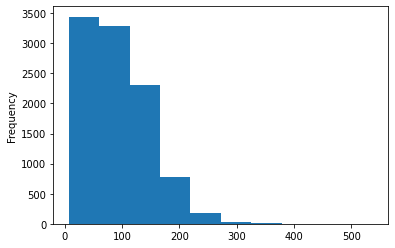

In [ ]:
data['AQI'].plot(kind="hist")

In [ ]:
from scipy.stats import boxcox

In [ ]:
# power transform
df1 = boxcox(data['AQI'], 0)

(array([  18.,  197.,  467., 1078., 1746., 1965., 2888., 1485.,  177.,
          13.]),
 array([1.93007109, 2.36585913, 2.80164717, 3.23743521, 3.67322325,
        4.10901129, 4.54479933, 4.98058737, 5.41637541, 5.85216345,
        6.28795149]),
 <a list of 10 Patch objects>)

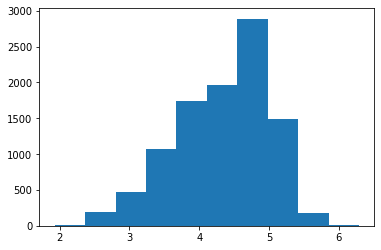

In [ ]:
plt.hist(df1)

In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(df1)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 87.434
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [ ]:
log_target = np.log1p(data["AQI"])

(array([  24.,  231.,  542., 1146., 1795., 1929., 2880., 1324.,  150.,
          13.]),
 array([2.06559613, 2.48801735, 2.91043857, 3.33285979, 3.75528101,
        4.17770223, 4.60012345, 5.02254467, 5.44496589, 5.86738711,
        6.28980833]),
 <a list of 10 Patch objects>)

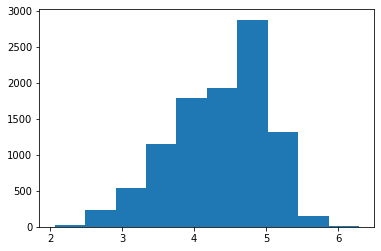

In [ ]:
plt.hist(log_target)

In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(log_target)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 83.881
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [ ]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(data["AQI"])

(array([ 229.,  994., 1879., 2020., 2520., 1760.,  540.,   77.,   11.,
           4.]),
 array([ 2.97833944,  4.83767935,  6.69701927,  8.55635918, 10.4156991 ,
        12.27503901, 14.13437893, 15.99371884, 17.85305876, 19.71239867,
        21.57173859]),
 <a list of 10 Patch objects>)

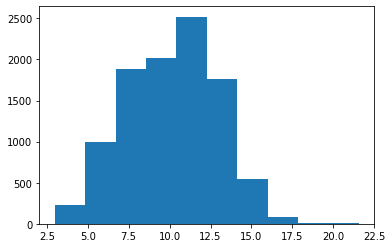

In [ ]:
plt.hist(yf_target)

In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(yf_target)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 31.461
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [ ]:
data['PM10']=data['PM10'].fillna(data['PM10'].median())
data['PM2.5']=data['PM2.5'].fillna(data['PM2.5'].median())
data['NO']=data['NO'].fillna(data['NO'].median())
data['NO2']=data['NO2'].fillna(data['NO2'].median())
data['SO2']=data['SO2'].fillna(data['SO2'].median())
data['CO']=data['CO'].fillna(data['CO'].median())
data['NH3']=data['NH3'].fillna(data['NH3'].median())

In [ ]:
pd.isnull(data["AQI"]).sum()

0

In [ ]:
data.count()

City           10034
Station        10034
Date           10034
FromDate       10034
ToDate         10034
PM2.5          10034
PM10           10034
NO             10034
NO2            10034
NH3            10034
SO2            10034
CO             10034
Benzene         8955
Ozone           7221
CH4              334
CO2             2594
I1(PM2.5)      10034
I2(PM10)       10034
I3(NO)         10034
I4(NO2)        10034
I5(NH3)        10034
I6(SO2)        10034
I7(CO)         10034
I1(PM2.5).1    10034
I2(PM10).1     10034
I3(NO).1       10034
I4(NO2).1      10034
I5(NH3).1      10034
I6(SO2).1      10034
I7(CO).1       10034
AQI            10034
dtype: int64

In [ ]:
x = data.iloc[:,6:12]
y = data['AQI']

In [ ]:
x

,PM10,NO,NO2,NH3,SO2,CO
0,289.36,70.61,58.47,174.30,3.01,0.20
1,266.66,59.70,51.01,153.50,3.24,0.35
2,237.63,76.37,92.88,157.16,8.28,1.11
3,243.11,86.95,45.14,185.24,3.26,0.76
4,180.92,62.56,68.73,131.72,7.24,1.80
...,...,...,...,...,...,...
10029,190.44,9.17,27.07,9.89,26.64,1.78
10030,252.58,10.33,33.07,9.13,19.91,1.80
10031,244.83,9.71,34.67,8.92,20.31,1.89
10032,234.80,9.14,30.31,9.43,20.84,1.84


In [ ]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (8027, 6)
X_test: (2007, 6)
Y_train: (8027,)
Y_test: (2007,)


In [ ]:
linreg=LinearRegression()
model=linreg.fit(x_train,y_train)

In [ ]:
y_predtrain=model.predict(x_train)

In [ ]:
df=pd.DataFrame()
df['Actual Value']=y_train
df['Predicted Value']=y_predtrain
df['Residual']=y_train-y_predtrain

In [ ]:
df.head()

,Actual Value,Predicted Value,Residual
3840,163.77,190.499668,-26.729668
1710,127.55,114.840435,12.709565
1986,51.48,49.972532,1.507468
6073,122.26,109.419362,12.840638
1255,17.61,74.709580,-57.099580


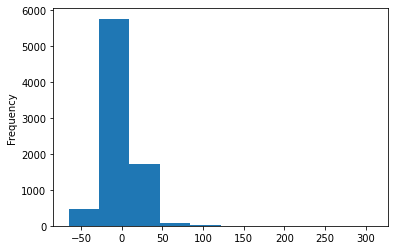

In [ ]:
df['Residual'].plot(kind='hist')

In [ ]:
from statsmodels.graphics.gofplots import qqplot

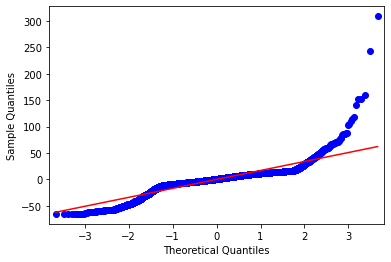

In [ ]:
# q-q plot
qqplot(df['Residual'], line='s')
plt.show()

In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(df['Residual'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 319.656
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 35.3899788 ,  35.98687515, 208.37457484, ...,  55.23889078,
        24.71497866, 164.838395  ])

In [ ]:
model.coef_


array([0.71516805, 0.28310502, 0.0224923 , 0.20538159, 0.04661477,
       0.07524291])

In [ ]:
model.intercept_

8.998107283730832

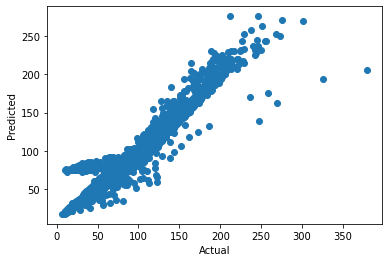

In [ ]:
plt.scatter(y_test,y_pred,cmap='gray');
plt.xlabel('Actual');
plt.ylabel('Predicted');

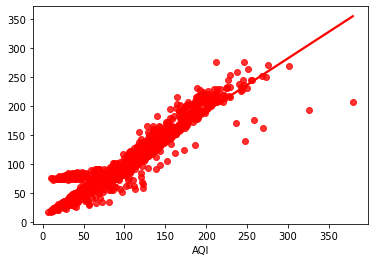

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [ ]:
pred_df

,Actual Value,Predicted Value,Difference
4456,31.56,35.389979,-3.829979
4561,33.10,35.986875,-2.886875
4100,196.09,208.374575,-12.284575
1312,50.03,49.478179,0.551821
1941,110.50,96.109441,14.390559
...,...,...,...
4313,113.45,101.241729,12.208271
2140,66.85,61.079935,5.770065
7586,60.15,55.238891,4.911109
7565,15.16,24.714979,-9.554979


(array([5.600e+01, 9.400e+01, 1.211e+03, 6.150e+02, 2.200e+01, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([-64.96615018, -41.19244176, -17.41873335,   6.35497507,
         30.12868348,  53.9023919 ,  77.67610031, 101.44980873,
        125.22351714, 148.99722556, 172.77093397]),
 <a list of 10 Patch objects>)

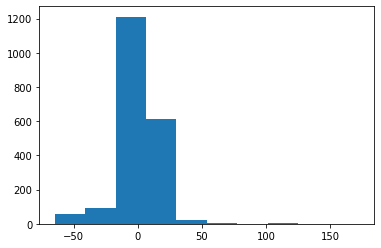

In [ ]:
plt.hist(pred_df['Difference'])

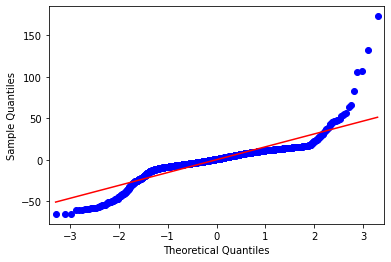

In [ ]:
# q-q plot
qqplot(pred_df['Difference'], line='s')
plt.show()

In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(pred_df['Difference'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.825, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson
# normality test
result = anderson(pred_df['Difference'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 71.774
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.655, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.090, data does not look normal (reject H0)


In [ ]:
pred_df.to_csv("Actual vs predicted value for MLR.csv")

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
corr=x.corr()
corr


,PM10,NO,NO2,NH3,SO2,CO
PM10,1.000000,0.202213,0.534395,0.253982,0.144411,-0.066860
NO,0.202213,1.000000,0.275144,0.310489,0.253432,-0.078828
NO2,0.534395,0.275144,1.000000,0.277496,0.202349,-0.009645
NH3,0.253982,0.310489,0.277496,1.000000,0.016929,-0.098481
SO2,0.144411,0.253432,0.202349,0.016929,1.000000,-0.147376
CO,-0.066860,-0.078828,-0.009645,-0.098481,-0.147376,1.000000


In [ ]:
corr.to_csv("corr MLR.csv")

In [ ]:
Accuracy=r2_score(y_train,y_predtrain)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 90.57


In [ ]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 91.31


In [ ]:
mape = np.mean(np.abs(y_predtrain - y_train) /np.abs(y_train)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_predtrain  - y_train)) # Mean absolute error
mpe = np.mean((y_predtrain  - y_train)/y_train) # Mean percentage error
rmse = np.mean((y_predtrain  -y_train)**2)**.5 # RMSE
corr = np.corrcoef (y_predtrain ,y_train) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_predtrain [:,None], y_train[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_predtrain [:,None], y_train[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.9516999390495148,
 'mae': 10.638695974458662,
 'mape': 0.1933069845841755,
 'minmax': 0.12328751130381255,
 'mpe': 0.09405968606067482,
 'rmse': 16.963058228006552}


In [ ]:
mape = np.mean(np.abs(y_pred - y_test) /np.abs(y_test)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_pred - y_test)) # Mean absolute error
mpe = np.mean((y_pred - y_test)/y_test) # Mean percentage error
rmse = np.mean((y_pred - y_test)**2)**.5 # RMSE
corr = np.corrcoef (y_pred, y_test) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_pred[:,None], y_test[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_test[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.9555808747583832,
 'mae': 9.885590374975274,
 'mape': 0.17502419626785212,
 'minmax': 0.11670103158032441,
 'mpe': 0.07651519172948075,
 'rmse': 15.500032267968425}
